**4.2. COVID modeling**

1. Explain the assumptions of the IHME COVID model described in Murray et al. (2020).

The first assumption of the IHME model is that current social distancing measures will be maintained. 

Another assumption is that severe patients are hospitalized and critical patients require an ICU stay. 

Also, there are four specific closure measures (closing schools, closing non-essential businesses, stay-at-home recommendations, and travel restrictions). Implementing 3 of the 4 measures is enough to ensure that states follow a trajectory similar to Wuhan. 

Lastly, it is assumed that any states that had not implemented closures would do so within a week. This article was published in May of 2020.


- What are the parameters of the model? Explain the influence of each parameter on the cumulative number of deaths.

$t$ is the time since the death rate exceeded $1e-15$.

$\beta$ is a location-specific inflection point. This is the time at which the rate of increase of the death rate is a maximum.

$\alpha$ is a location-specific growth parameter.

$p$ is the control for the maximum death rate at each location.


- Can the model represent “waves” of infections? If so, how?

2. List the five things you think make it hardest to predict COVID cases.

1) How well people adhere to social distancing measures.
2) Lack of good data.
3) Lack of training data.
4) Every city, county, and state has implemented different measures.
5) Natural disasters happen that force safety measures to take a back seat.

- Explain why you think they are the most serious difficulties.

1. People are incredibly unpredictable. Some people never leave their house and some people are going to frat parties. Some people are somewhere in between. You can't use the average person's level of social contact as an estimate. 

2. A lot of people who have COVID are asymptomatic and don't get tested. Even some people who are symptomatic don't get tested. So it's really hard to know what the actual infection rate is at any given time because there isn't enough testing.

3. Statistical models require training data to fit the model. The IHME model used Wuhan as a reference, but there's no guarantee that they are representative of any other place. 

4. There is too much variability in closures and social distancing measures. Since COVID cases are dependent on these things, the variability makes prediction hard.

5. When a natural disaster happens and people have to stay in a temporary shelter with people outside their household, it has the potential to increase COVID cases. The CZU fire is a good example of this.

- Which, if any, are addressed in the IHME paper?

The point of using the population death rate is that it reflects the transmission and case-fatality rates in each community. This addresses the second and fourth problems. It addresses the data problem because death data is better kept and more accurate. It addresses the fourth problem because the death rate for each community can actually be calculated with the current data.

- What do Jewell et al. (2020) have to say about those problems?

Jewell et al. says that short term predictions are helpful for planning for hospitals, but long-term predictions are not accurate enough. It is hard to strike a balance between simple and complex in terms of the model. This is a classic bias-variance tradeoff. The predictions from COVID models are so varied that they can't be relied on too heavily. We should be scrutinizing any projections before we let them influence policy.

In [4]:
#loading packages and functions
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import covid_model; importlib.reload(covid_model)
from covid_model import *

In [19]:
#importing data
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [20]:
#cleaning data
covid_data_alameda = covid_data[covid_data['Admin2'] == 'Alameda']
t = covid_data_alameda.transpose().reset_index()
idx_start_day = t[t[195] == 4].index[0]
alameda = t.rename(index = str, columns = {'index':'date', 195:'cumulative_deaths'}).iloc[idx_start_day:, :].reset_index(drop = True)
alameda.loc[:, "date"] = pd.to_datetime(alameda.loc[:, "date"])

In [21]:
#subsetting data
data_30 = alameda.iloc[0:30, :]
data_90 = alameda.iloc[0:90, :]
data_180 = alameda.iloc[0:180, :]
data_270 = alameda.iloc[0:270, :]
data_full = alameda[alameda['date'] <= '2021-02-15']

In [22]:
#inputs for first 30 days
x_val_30 = np.arange(30)
y_val_30 = np.array(data_30['cumulative_deaths'])

In [23]:
#fitting least squares model to first 30 days data
alpha_30, beta_30, p_30 = IHME_min(IHME, x_val_30, y_val_30)
predictions_30 = IHME(x_val_30, alpha_30, beta_30, p_30)

In [24]:
#calculating MSE for first 30 days
mse_30 = mse(y_val_30, predictions_30)
mse_30

7.191726526095248

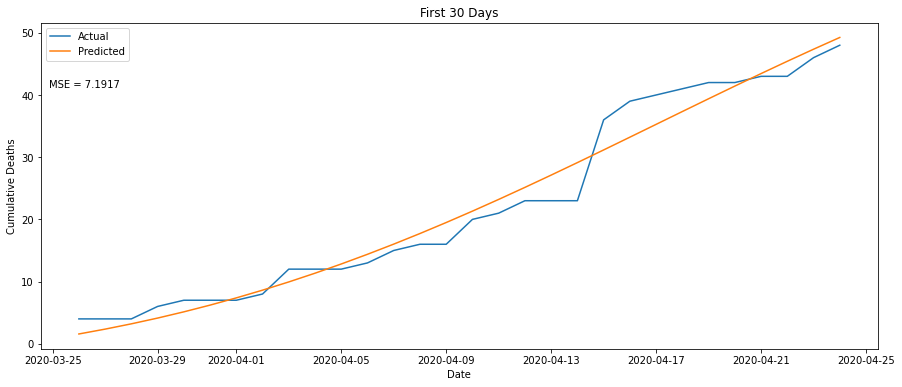

In [25]:
#plot first 30 days
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(data_30['date'], data_30['cumulative_deaths'], label = 'Actual')
ax.plot(data_30['date'], predictions_30, label = 'Predicted')
ax.set_title('First 30 Days')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Deaths')
ax.text(0.01, 0.8, 'MSE = ' + str(np.round(mse_30, decimals = 4)), transform=ax.transAxes)
ax.legend();

In [26]:
#inputs for first 90 days
x_val_90 = np.arange(90)
y_val_90 = np.array(data_90['cumulative_deaths'])

In [27]:
#fitting least squares model to first 90 days data
alpha_90, beta_90, p_90 = IHME_min(IHME, x_val_90, y_val_90, p0 = [alpha_30, beta_30, p_30])
predictions_90 = IHME(x_val_90, alpha_90, beta_90, p_90)

In [28]:
#calculating MSE for first 90 days
mse_90 = mse(y_val_90, predictions_90)
mse_90

14.990817762712638

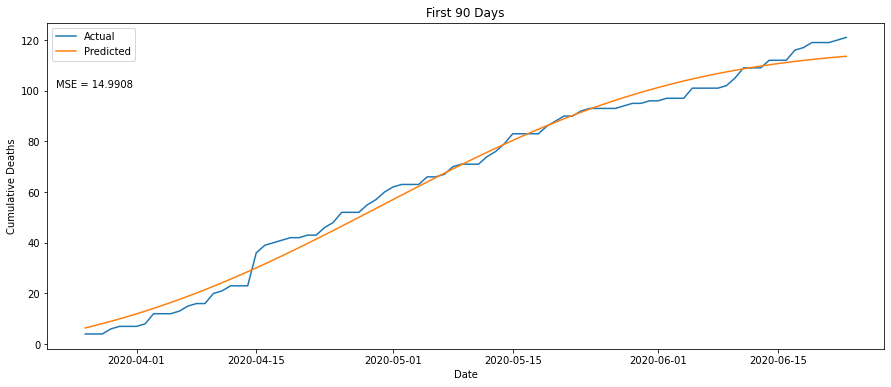

In [29]:
#plot first 90 days
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(data_90['date'], data_90['cumulative_deaths'], label = 'Actual')
ax.plot(data_90['date'], predictions_90, label = 'Predicted')
ax.set_title('First 90 Days')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Deaths')
ax.text(0.01, 0.8, 'MSE = ' + str(np.round(mse_90, decimals = 4)), transform=ax.transAxes)
ax.legend();

In [30]:
#inputs for first 180 days
x_val_180 = np.arange(180)
y_val_180 = np.array(data_180['cumulative_deaths'])

In [31]:
#fitting least squares model to first 90 days data
alpha_180, beta_180, p_180 = IHME_min(IHME, x_val_180, y_val_180, p0 = [alpha_90, beta_90, p_90])
predictions_180 = IHME(x_val_180, alpha_180, beta_180, p_180)

In [32]:
#calculating MSE for first 180 days
mse_180 = mse(y_val_180, predictions_180)
mse_180

230.73931690163994

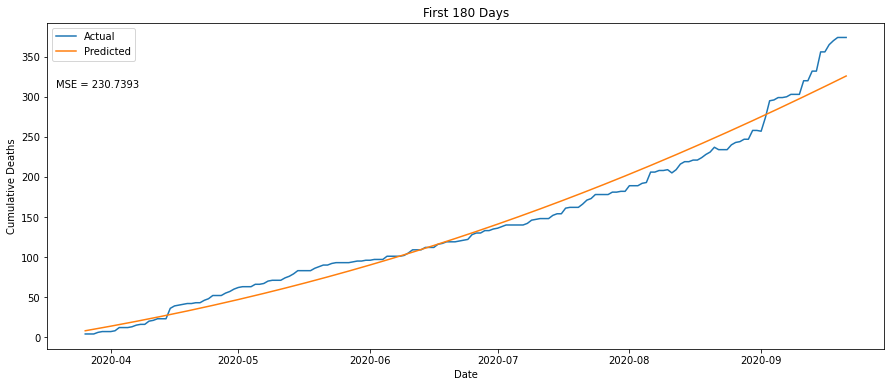

In [33]:
#plot first 180 days
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(data_180['date'], data_180['cumulative_deaths'], label = 'Actual')
ax.plot(data_180['date'], predictions_180, label = 'Predicted')
ax.set_title('First 180 Days')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Deaths')
ax.text(0.01, 0.8, 'MSE = ' + str(np.round(mse_180, decimals = 4)), transform=ax.transAxes)
plt.legend();

In [34]:
#inputs for first 270 days
x_val_270 = np.arange(270)
y_val_270 = np.array(data_270['cumulative_deaths'])

In [35]:
#fitting least squares model to first 270 days data
alpha_270, beta_270, p_270 = IHME_min(IHME, x_val_270, y_val_270, p0 = [alpha_180, beta_180, p_180])
predictions_270 = IHME(x_val_270, alpha_270, beta_270, p_270)

In [36]:
#calculating MSE for first 270 days
mse_270 = mse(y_val_270, predictions_270)
mse_270

432.83558319181293

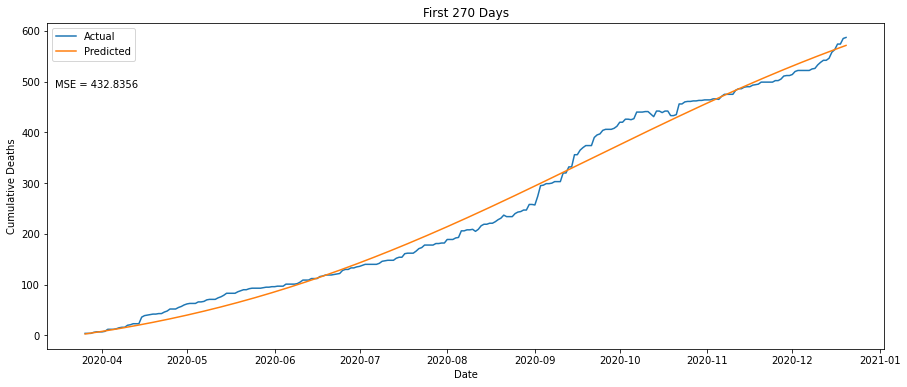

In [37]:
#plot first 270 days
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(data_270['date'], data_270['cumulative_deaths'], label = 'Actual')
ax.plot(data_270['date'], predictions_270, label = 'Predicted')
ax.set_title('First 270 Days')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Deaths')
ax.text(0.01, 0.8, 'MSE = ' + str(np.round(mse_270, decimals = 4)), transform=ax.transAxes)
plt.legend();

In [38]:
#inputs for full data
x_val_full = np.arange(len(data_full))
y_val_full = np.array(data_full['cumulative_deaths'])

In [39]:
#fitting least squares model to full data
alpha_full, beta_full, p_full = IHME_min(IHME, x_val_full, y_val_full, p0 = [alpha_270, beta_270, p_270])
predictions_full = IHME(x_val_full, alpha_full, beta_full, p_full)

In [40]:
#calculating MSE for full data
mse_full = mse(y_val_full, predictions_full)
mse_full

3058.0693973433517

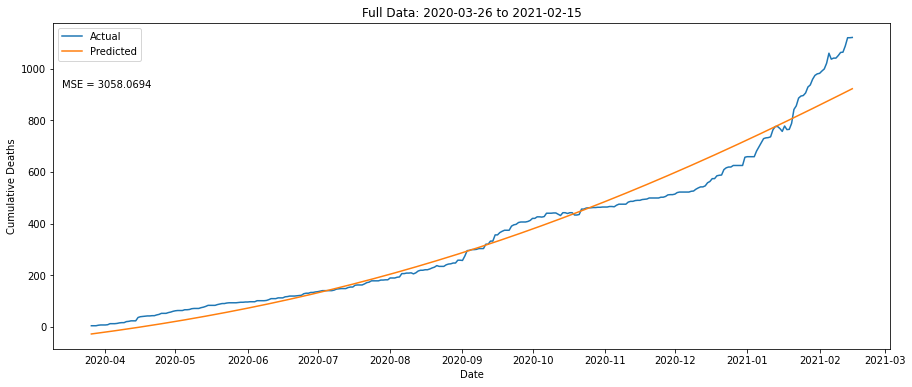

In [41]:
#plot full data
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(data_full['date'], data_full['cumulative_deaths'], label = 'Actual')
ax.plot(data_full['date'], predictions_full, label = 'Predicted')
ax.set_title('Full Data: 2020-03-26 to 2021-02-15')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Deaths')
ax.text(0.01, 0.8, 'MSE = ' + str(np.round(mse_full, decimals = 4)), transform=ax.transAxes)
plt.legend();

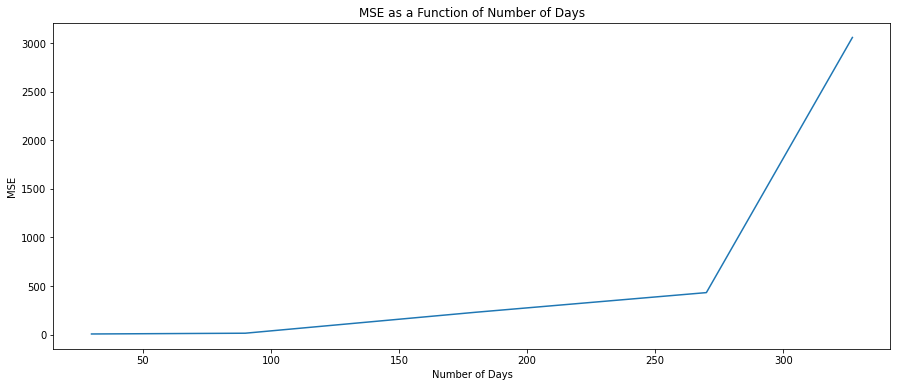

In [42]:
#plot MSEs
mse_x = [30, 90, 180, 270, len(data_full)]
mses = [mse_30, mse_90, mse_180, mse_270, mse_full]

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(mse_x, mses)
plt.title('MSE as a Function of Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('MSE');

What if we try to predict cumulative deaths through 2021-02-15 from the first 30 days?

In [43]:
predictions_full_from_30 = IHME(x_val_full, alpha_30, beta_30, p_30)
predictions_full_from_90 = IHME(x_val_full, alpha_90, beta_90, p_90)
predictions_full_from_180 = IHME(x_val_full, alpha_180, beta_180, p_180)
predictions_full_from_270 = IHME(x_val_full, alpha_270, beta_270, p_270)

In [44]:
mse_full_from_30 = mse(y_val_full, predictions_full_from_30)
mse_full_from_90 = mse(y_val_full, predictions_full_from_90)
mse_full_from_180 = mse(y_val_full, predictions_full_from_180)
mse_full_from_270 = mse(y_val_full, predictions_full_from_270)

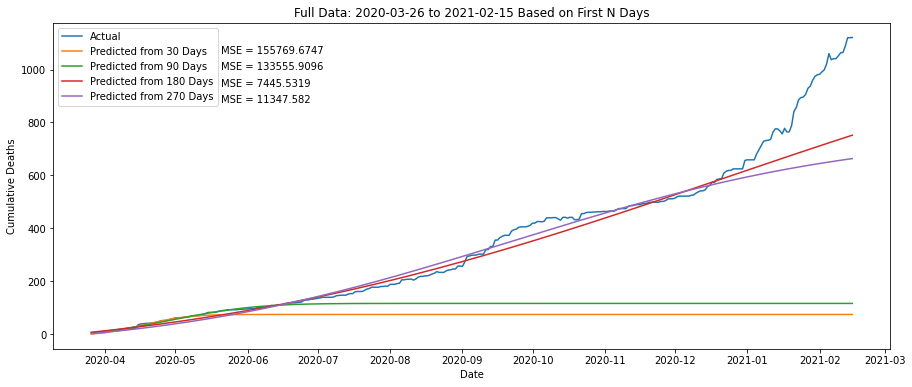

In [49]:
#plot full data
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(data_full['date'], data_full['cumulative_deaths'], label = 'Actual')
ax.plot(data_full['date'], predictions_full_from_30, label = 'Predicted from 30 Days')
ax.plot(data_full['date'], predictions_full_from_90, label = 'Predicted from 90 Days')
ax.plot(data_full['date'], predictions_full_from_180, label = 'Predicted from 180 Days')
ax.plot(data_full['date'], predictions_full_from_270, label = 'Predicted from 270 Days')
ax.set_title('Full Data: 2020-03-26 to 2021-02-15 Based on First N Days')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Deaths')
ax.text(0.2, 0.905, 'MSE = ' + str(np.round(mse_full_from_30, decimals = 4)), transform=ax.transAxes)
ax.text(0.2, 0.855, 'MSE = ' + str(np.round(mse_full_from_90, decimals = 4)), transform=ax.transAxes)
ax.text(0.2, 0.805, 'MSE = ' + str(np.round(mse_full_from_180, decimals = 4)), transform=ax.transAxes)
ax.text(0.2, 0.755, 'MSE = ' + str(np.round(mse_full_from_270, decimals = 4)), transform=ax.transAxes)
plt.legend()
fig.savefig('model_graph.png');

Yikes!

In [46]:
%%bash
pycodestyle covid_model.py

In [47]:
%%bash
pytest covid_model.py

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.2, py-1.10.0, pluggy-0.13.1
rootdir: /home/jovyan/Covid-Model
plugins: cov-2.11.1, anyio-2.1.0
collected 16 items

covid_model.py ................                                          [100%]

============================== 16 passed in 0.54s ==============================


In [48]:
%%bash
pep257 covid_model.py